<a href="https://colab.research.google.com/github/douglasbechara/Notebooks/blob/main/11_12_MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Douglas_Bechara_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP da Sprint: Análise de dados e boas práticas**
Aluno: Douglas Bechara Santos


# **1. Definição do problema**




Possui objetivo de realizar análises em um Data Frame de dados escolares de alunos de um curso Técnico em Informática Integrado ao Ensino Médio, retirado do Sistema Integrado de Atividades Acadêmicas - SIGAA de uma instituição educacional.

O Data Frame apresentado é trabalhado com dados tabulares que pode ser entendido como uma tabela que organiza os dados em linhas e colunas, criando uma estrutura de dados bidimensional e que classificamos como aprendizado supervisionado, pois os dados do Data Frame em questão possuem variáveis *target*, ou seja, nossas variáveis de interesse no conjunto de dados em questão, com isso abrimos a possibilidade de prever resultados finais

O objetivo primordial foi compreender a estrutura dos dados, identificando possíveis desafios e padrões que pudessem influenciar as análises subsequentes.

Diante a resposta dessas perguntas, poderemos propor possíveis soluções para cada questionamento levantado, para isso, realizaremos estudos .... onde será necessário ....

Sabemos que Data Frame possui os seguintes atributos:
* 1º Bimestre
* 2º Bimestre
* 3º Bimestre

# **2. Importação de bibliotecas**

In [38]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from matplotlib import cm
import missingno as ms


# **3. Coletando dados do Github**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/douglasbechara/Dataset/main/notas.csv")

# **4. Análise dos dados**

## 4.1 Compreensão do Data Frame

### 4.1.1 Visão geral

In [3]:
# Observar o tamanho do DataFrame que possui 559 linhas e 3 colunas.
df.shape

(559, 3)

 Com objetivo de retorna uma tupla representando as dimensões do DataFrame, ou seja, o número de linhas e colunas, pode ser útil para entender o tamanho total do DataFrame e ter uma visão geral da sua estrutura.

 O DataFrame possui 559 linhas e 3 colunas

In [4]:
# Visualização das primeiras linhas do Data Frame
df.head()

,8.25,8.13,7.50
0,10.0,10.0,9.0
1,9.3,8.8,7.0
2,7.0,7.0,NaN
3,10.0,9.0,10.0
4,9.0,10.0,10.0


O Comando tem por obejtivo retornar as primeiras linhas do DataFrame.

Ajuda a dar uma rápida visão das primeiras observações no DataFrame, permitindo uma rápida inspeção dos dados iniciais.

Observamos que o DataFrame não possui rótulos nas colunas.

Uma informação importante é que os datos são reais e devido conhecer a história do Dataframe, sei que as notas dos alunos foram cadastradas no sistema até o 3º bimestre, pois os mesmos ainda estão cursando o ano letivo.

In [5]:
# Atribuição de rótulos para as colunas
# Coluna 8.25 -> 1º Bimestre
# Coluna 8.13 -> 2º Bimestre
# Coluna 7.50 -> 3º Bimestre
df.columns = ['1º Bimestre', '2º Bimestre', '3º Bimestre']

Renomeia as colunas do DataFrame.

Será útil para tornar os nomes das colunas mais descritivos e facilitar a compreensão dos dados.

In [6]:
# Visualiza as últimas linhas
# Últimas inserções de valores no Data Frame
df.tail()

,1º Bimestre,2º Bimestre,3º Bimestre
554,8.0,8.0,NaN
555,9.0,7.2,9.3
556,9.0,10.0,9.0
557,9.5,8.0,8.5
558,7.5,7.7,9.0


Retorna as últimas linhas do DataFrame, fornecendo uma visão das últimas observações no DataFrame, permitindo uma rápida inspeção dos dados finais.

In [7]:
# Pegar uma amostra das linhas para visualização
df.sample(10)

,1º Bimestre,2º Bimestre,3º Bimestre
69,10.0,10.00,NaN
89,7.5,6.50,8.50
457,9.0,6.50,6.50
519,6.0,7.50,7.50
334,5.0,2.50,7.20
339,10.0,9.50,10.00
28,8.0,8.00,8.00
435,10.0,9.50,10.00
502,8.5,8.50,10.00
239,8.0,8.25,7.42


Retorna uma amostra aleatória de linhas do DataFrame.

Útil para analisar uma pequena amostra representativa dos dados.

In [8]:
# Apresenta, de forma resumida, quais os tipos de variáveis
df.dtypes

1º Bimestre    float64
2º Bimestre    float64
3º Bimestre    float64
dtype: object

Retorna os tipos de dados de cada coluna no DataFrame.

Permite entender os tipos de dados presentes em cada coluna, essencial para garantir que os dados sejam interpretados corretamente.

In [9]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1º Bimestre  556 non-null    float64
 1   2º Bimestre  550 non-null    float64
 2   3º Bimestre  408 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB


Fornece informações concisas sobre o DataFrame, incluindo tipos de dados e valores não nulos.

Ajuda a identificar rapidamente o tamanho do DataFrame, tipos de dados e se há valores ausentes.

In [10]:
# Estatíticas descritivas do dataset
df.describe()

,1º Bimestre,2º Bimestre,3º Bimestre
count,556.000000,550.000000,408.000000
mean,7.694874,7.695891,7.661029
std,2.404623,2.480758,2.599632
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000
50%,8.240000,8.250000,8.410000
75%,9.300000,9.375000,9.500000
max,10.000000,10.000000,10.000000


Gera estatísticas descritivas para colunas numéricas no DataFrame.

Oferece uma visão estatística resumida, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [11]:
# Resumo estatístico das variáveis que interessam

# Colunas:
# df.iloc[:,0] -> Todos os dados da primeira coluna do dataset
# df.iloc[0:5,-1] -> Do primeiro ao quinto dado da última coluna
df.iloc[:,0].describe()

count    556.000000
mean       7.694874
std        2.404623
min        0.000000
25%        7.000000
50%        8.240000
75%        9.300000
max       10.000000
Name: 1º Bimestre, dtype: float64

Descreve estatísticas para uma coluna específica usando indexação baseada em posição.

Útil para obter estatísticas específicas para uma única coluna.

In [12]:
# Seleção de múltiplas linhas e colunas:
#df.iloc[0:3] # resgatando as primeiras três linhas do dataset
#df.iloc[:, 1:3] # todos os dados da segunda e terceira coluna
df.iloc[[0,2,4], 1:3] # 1º,3º e 5º elementos e 2ª a 3ª colunas

,2º Bimestre,3º Bimestre
0,10.0,9.0
2,7.0,NaN
4,10.0,10.0


Seleciona linhas e colunas específicas usando indexação baseada em posição.

Permite extrair um subconjunto específico de dados para análise.

In [13]:
# Todos os dados de todas as colunas
df.loc[:,:].describe()

,1º Bimestre,2º Bimestre,3º Bimestre
count,556.000000,550.000000,408.000000
mean,7.694874,7.695891,7.661029
std,2.404623,2.480758,2.599632
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000
50%,8.240000,8.250000,8.410000
75%,9.300000,9.375000,9.500000
max,10.000000,10.000000,10.000000


Descreve estatísticas para todas as colunas usando indexação baseada em rótulos.

Similar a df.describe(), mas usando rótulos de coluna em vez de posições.

### 4.1.2 Há valores faltantes?

In [14]:
# Apresenta quantos dados faltantes
df.isna().sum()

1º Bimestre      3
2º Bimestre      9
3º Bimestre    151
dtype: int64

Conta o número de valores ausentes em cada coluna.
Ajuda a identificar colunas com dados ausentes, facilitando a tomada de decisões sobre como lidar com eles.

* A saída indica que há valores nulos em três colunas:

* 1º Bimestre com 3 registros
* 2º Bimestre com 9 registros
* 3º Bimestre com 151 registros

Os números à direita representam a quantidade de valores nulos em cada coluna.

In [15]:
# Identificar a porcentagem de valores nulos
# É útil para entender a extensão do nosso problema.
total_rows = len(df)
percent_missing = (df.isna().sum() / total_rows) * 100
print(percent_missing)

1º Bimestre     0.536673
2º Bimestre     1.610018
3º Bimestre    27.012522
dtype: float64


Calcula o percentual de valores ausentes em cada coluna.

Fornece uma visão percentual dos dados ausentes, auxiliando na avaliação do impacto desses valores ausentes.

Observamos que existe 27.012522% de valores faltantes no 3º Bimestre.
Neste momento devemos decidir sobre a imputação ou remoção de valores nulos, levando em consideração:
* Se a quantidade de valores nulos é pequena, pode ser aceitável imputar valores (preenchendo com a média, mediana ou um valor específico).
Para preencher os valores nulos em uma coluna com a média, por exemplo, poderíamos fazer algo assim:  ```df['8.25'].fillna(df['8.25'].mean(), inplace=True)```

* Se a quantidade de valores nulos é significativa, podemos considerar a remoção das linhas ou colunas afetadas. Neste caso, ralizamos o sequinte código: ```df.dropna(inplace=True)```

Conclui-se que a porcentagem é elevada para o dataset, sendo assim opta-se pela remoção das linhas afetadas. Fato esse que será tratado na etapa de Pré-processamento dos dados.
[Fonte](https://dev.to/franciscojdsjr/tratamento-de-dados-nulos-no-pandas-uma-abordagem-completa-e-detalhada-41n1)




### 4.1.3 Número de valores únicos no Data Frame para cada coluna

In [16]:
df.nunique()

1º Bimestre    77
2º Bimestre    68
3º Bimestre    66
dtype: int64

Retorna o número de valores únicos em cada coluna.

Ajuda a entender a variedade e a cardinalidade dos dados em cada coluna.

## 4.2 Explorar visualmente os dados
* A análise exploratória de dados envolve a compreensão das distribuições, relações e padrões nos dados.

* Histogramas, densidades e boxplots ajudam a entender a distribuição e variabilidade das variáveis.

* Gráficos de dispersão e matrizes de correlação revelam relações entre variáveis.

* O heatmap fornece uma visão compacta das correlações.

* Gráficos 3D e radar/spider são úteis para explorar padrões complexos.

* Swarm plots destacam a distribuição de dados categóricos.

* Ao aplicar essas visualizações em conjunto, podemos obter insights sobre a estrutura, tendências e possíveis relações nos dados. A análise visual é fundamental para orientar decisões sobre a modelagem e a abordagem de análises mais avançadas.

* Esses gráficos são ferramentas para descoberta de padrões, identificação de outliers e entendimento geral da natureza dos dados.

### 4.2.1 Distribuição e variabilidade das variáveis

#### 4.2.2 Histograma
Por meio de histograma, vamos dar maior embasamento quanto a necessidade de aplicar uma transformação dos dados.

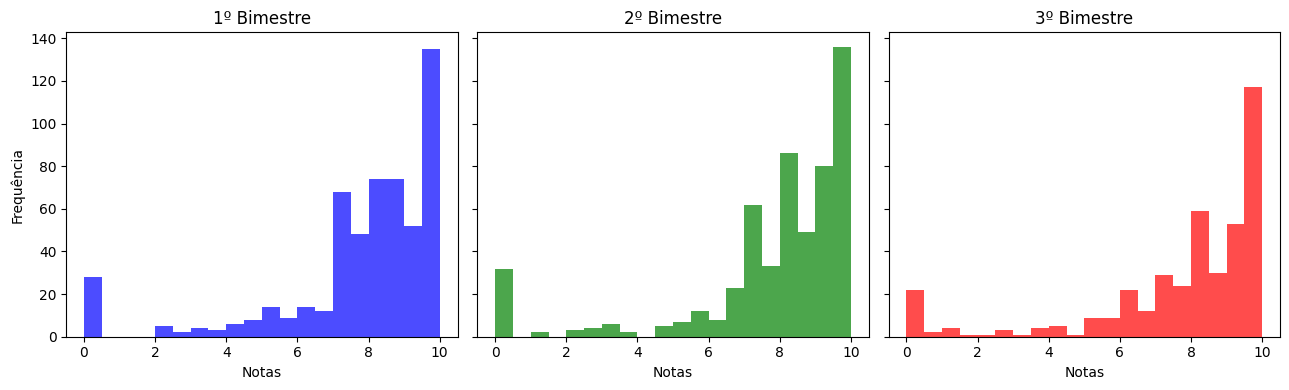

In [17]:
# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

# Histograma para a coluna 1º Bimestre
axs[0].hist(df['1º Bimestre'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('1º Bimestre')
axs[0].set_xlabel('Notas')
axs[0].set_ylabel('Frequência')

# Histograma para a coluna 2º Bimestre
axs[1].hist(df['2º Bimestre'], bins=20, color='green', alpha=0.7)
axs[1].set_title('2º Bimestre')
axs[1].set_xlabel('Notas')

# Histograma para a coluna 3º Bimestre
axs[2].hist(df['3º Bimestre'], bins=20, color='red', alpha=0.7)
axs[2].set_title('3º Bimestre')
axs[2].set_xlabel('Notas')

# Ajustar layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

#### 4.2.3 Densidade de cada atribuito

<ipython-input-18-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)
<ipython-input-18-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)
<ipython-input-18-0e3687f91867>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label=col, shade=True)


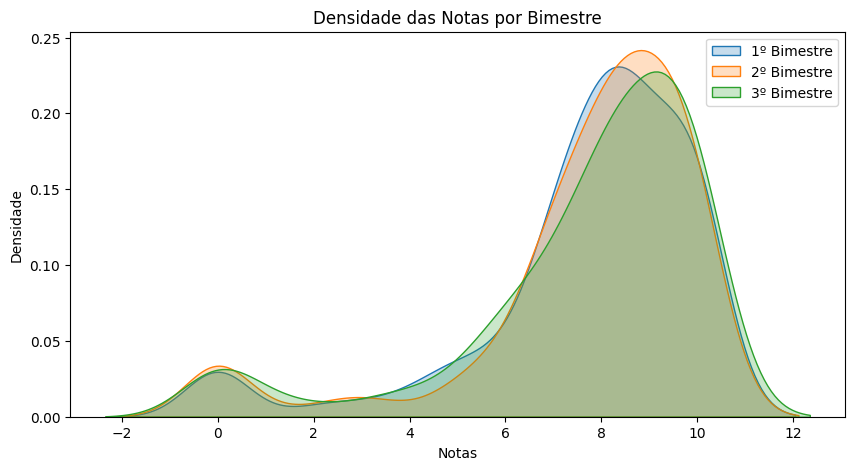

In [18]:
# Densidade de cada atribuito

# Configurar a figura
plt.figure(figsize=(10, 5))

# Criar gráficos de densidade para cada coluna
for col in df.columns:
    sns.kdeplot(df[col], label=col, shade=True)

# Adicionar título e rótulos aos eixos
plt.title('Densidade das Notas por Bimestre')
plt.xlabel('Notas')
plt.ylabel('Densidade')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

* O eixo x representa as notas dos alunos, e o eixo y representa a densidade da distribuição dessas notas.
* Cada curva colorida representa a distribuição de densidade das notas para um bimestre específico.
* A área sob cada curva representa a probabilidade de uma nota ocorrer nesse bimestre.
* Se as curvas são mais largas, isso sugere uma maior variabilidade nas notas, enquanto curvas mais estreitas indicam menos variabilidade.

#### 4.2.4 Boxplots

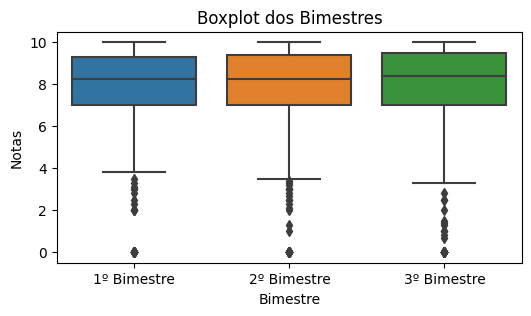

In [19]:
# Configurar a figura
plt.figure(figsize=(6, 3))

# Criar o boxplot
sns.boxplot(data=df)
plt.title('Boxplot dos Bimestres')
plt.xlabel('Bimestre')
plt.ylabel('Notas')

# Mostrar o gráfico
plt.show()

### 4.2.2 Relações entre variáveis

#### 4.2.2.1 Diagramas de dispersão

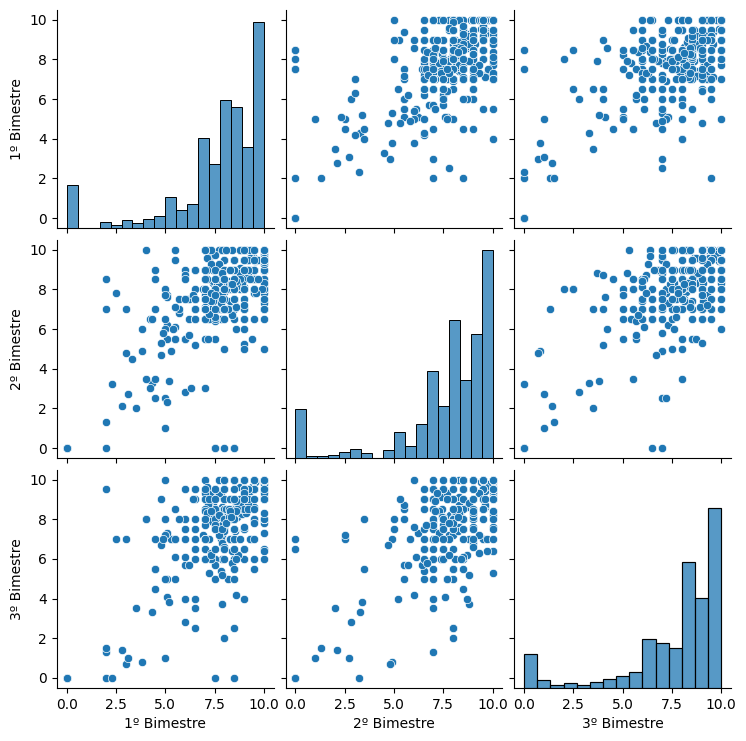

In [20]:
# Escolher as colunas para a matriz de diagramas de dispersão
columns = ['1º Bimestre', '2º Bimestre', '3º Bimestre']

# Criar matriz de diagramas de dispersão
sns.pairplot(df[columns])
plt.show()

#### 4.2.2.2 Matriz de correlação de Pearson


In [21]:
# Calcular a matriz de correlação de Pearson
correlation_matrix = df[['1º Bimestre', '2º Bimestre', '3º Bimestre']].corr(method='pearson')

# Mostrar a matriz de correlação
print(correlation_matrix)

             1º Bimestre  2º Bimestre  3º Bimestre
1º Bimestre     1.000000     0.785143     0.783251
2º Bimestre     0.785143     1.000000     0.804359
3º Bimestre     0.783251     0.804359     1.000000


A diagonal principal sempre terá um coeficiente de correlação de 1, porque é a correlação de uma variável consigo mesma. Isso é esperado.

* **1º Bimestre vs. 2º Bimestre:** O coeficiente de 0.785143 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 1º Bimestre e as notas no 2º Bimestre tendem a aumentar juntas.

* **1º Bimestre vs. 3º Bimestre:** O coeficiente de 0.783251 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 1º Bimestre e as notas no 3º Bimestre (7.50) tendem a aumentar juntas.

* **2º Bimestre vs. 3º Bimestre:** O coeficiente de 0.804359 indica uma correlação positiva forte (próxima de 1), sugerindo que as notas no 2º Bimestre e as notas no 3º Bimestre tendem a aumentar juntas.

A matriz de correlação sugere que há correlações positivas fortes entre as notas nos diferentes bimestres, indicando que, em geral, as notas tendem a aumentar ou diminuir em conjunto entre os bimestres.

### 4.2.3 Visão compacta das correlações

#### 4.2.3.1 Mapa de calor (heatmap)

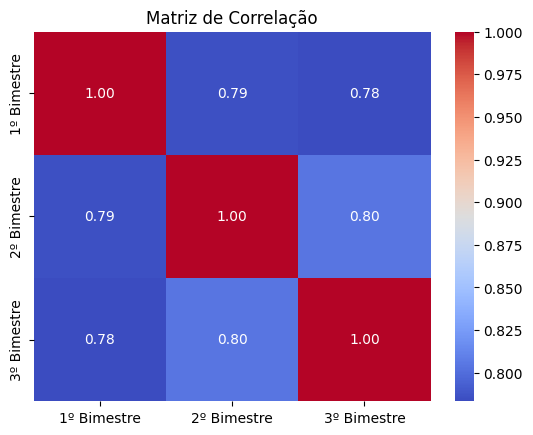

In [22]:
# Criar um mapa de calor (heatmap) para facilitar a visualização da correlação existente.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 4.2.4 Explorar padrões complexos

#### 4.2.4.1 Gráfico 3D

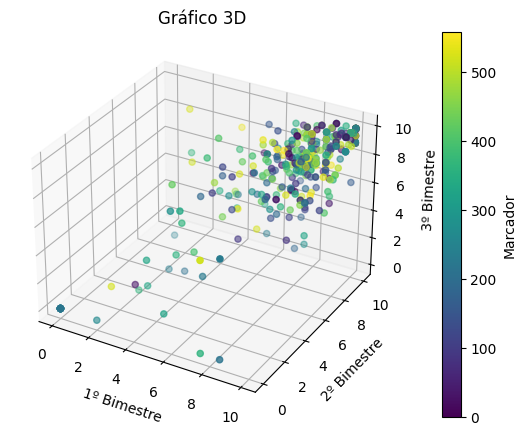

In [24]:
# Configurar a figura 3D
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

# Criar o gráfico 3D com cores diferentes para cada marcador
cores = np.arange(len(df))
sc = ax.scatter(df['1º Bimestre'], df['2º Bimestre'], df['3º Bimestre'], c=cores, cmap='viridis', marker='o')

# Adicionar rótulos aos eixos
ax.set_xlabel('1º Bimestre')
ax.set_ylabel('2º Bimestre')
ax.set_zlabel('3º Bimestre')

# Adicionar título
ax.set_title('Gráfico 3D')

# Adicionar barra de cores
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Marcador')

# Mostrar o gráfico
plt.show()

#### 4.2.4.2 Gráfico de Radar/Spider

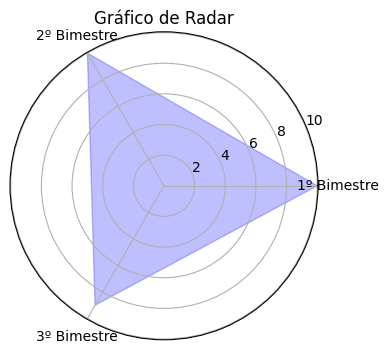

In [25]:
# Configurar o número de variáveis
num_variaveis = len(df.columns)

# Calcular os ângulos para cada variável
angulos = np.linspace(0, 2 * np.pi, num_variaveis, endpoint=False).tolist()

# Adicionar o primeiro valor no final para fechar o círculo
valores = df.iloc[0].tolist()
valores += valores[:1]
angulos += angulos[:1]

# Configurar a figura
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Plotar o gráfico de radar
ax.fill(angulos, valores, color='blue', alpha=0.25)
ax.set_thetagrids(np.degrees(angulos[:-1]), df.columns)

# Adicionar título
ax.set_title('Gráfico de Radar')

# Mostrar o gráfico
plt.show()

* Cada nota é representado por um raio no gráfico de radar.
* A distância do centro para o ponto em cada raio representa o desempenho médio no bimestre.
* O gráfico mostra a tendência geral de desempenho nos bimestres.

#### 4.2.4.3 Gráfico Swarm Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.3% of the points cannot be plac

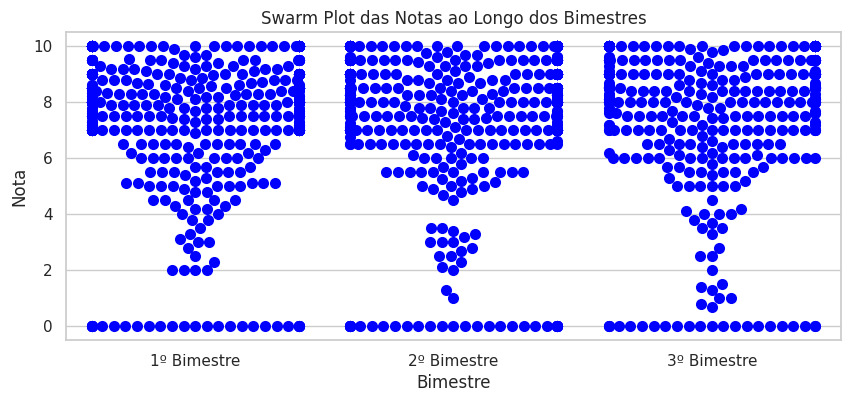

In [26]:
# Melt o DataFrame para o formato necessário para o swarm plot
df_melted = pd.melt(df, var_name='Bimestre', value_name='Nota')

# Configurar o estilo
sns.set(style="whitegrid")

# Criar o swarm plot
plt.figure(figsize=(10, 4))
sns.swarmplot(x='Bimestre', y='Nota', data=df_melted, color='blue', size=8)

# Adicionar título
plt.title('Swarm Plot das Notas ao Longo dos Bimestres')

# Mostrar o gráfico
plt.show()

Cada ponto representa a nota de um aluno em um determinado bimestre.

A posição horizontal dos pontos indica o bimestre, e a posição vertical representa a nota do aluno.

Identificamos os padrões de concentração e dispersão das notas, a qual as maiores notas concetram-se acima da média 7 nos 3 bimestres o que representa um desempenho médio satisfatório e com baixa variação entre os bimestres.

# **5. Pré-processamento dos dados**

## 5.1 Tratando dados faltantes

### 5.1.1 Observando dados faltantes

In [27]:
# Caso tenha dados faltantes, podemos tirar as linhas
#df = df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1º Bimestre  556 non-null    float64
 1   2º Bimestre  550 non-null    float64
 2   3º Bimestre  408 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB


In [28]:
# Apresenta quantos dados faltantes
df.isna().sum()

1º Bimestre      3
2º Bimestre      9
3º Bimestre    151
dtype: int64

### 5.1.2 Limpando dados faltantes

In [34]:
# Criar um novo DataFrame ('df1') removendo linhas com valores ausentes
df1 = df.dropna()

# Exibir as primeiras linhas do novo DataFrame
print(df1.head())

   1º Bimestre  2º Bimestre  3º Bimestre
0         10.0         10.0          9.0
1          9.3          8.8          7.0
3         10.0          9.0         10.0
4          9.0         10.0         10.0
6          8.5          9.0         10.0


In [36]:
# Apresenta quantos dados faltantes no novo DataFrame (df1)
df1.isna().sum()

1º Bimestre    0
2º Bimestre    0
3º Bimestre    0
dtype: int64

O novo DataFrame (df1) foi derivado do DataFrame original (df) após a aplicação de um procedimento de remoção de linhas contendo dados faltantes.

O método utilizado para esta operação foi o dropna(), que eliminou todas as observações que continham pelo menos um valor ausente.

Após a realização dessa operação, verificou-se que o DataFrame df1 não possui mais valores faltantes em suas linhas, representando uma versão limpa e completa do conjunto de dados original.

## 5.2 Há dados duplicados?

### 5.2.1 Identificar linhas duplicadas.

In [43]:
# Verificar linhas duplicadas no DataFrame
duplicated_rows = df1[df1.duplicated()]

# Exibir as linhas duplicadas
print("Linhas Duplicadas:")
print(duplicated_rows)

Linhas Duplicadas:
     1º Bimestre  2º Bimestre  3º Bimestre
19         10.00         9.00         10.0
35         10.00         9.00         10.0
51         10.00         9.00         10.0
55         10.00         9.00         10.0
59         10.00        10.00         10.0
..           ...          ...          ...
534         8.50         8.50         10.0
543         8.32         8.25          8.1
544        10.00        10.00         10.0
547        10.00         9.50         10.0
550         8.50         8.00          9.0

[125 rows x 3 columns]


### 5.2.2 Remover linhas duplicadas.

In [44]:
# Remover linhas duplicadas do DataFrame
df1_no_duplicates = df1.drop_duplicates()

# Exibir as primeiras linhas do DataFrame sem duplicatas
print("\nDataFrame Sem Duplicatas:")
print(df1_no_duplicates.head())


DataFrame Sem Duplicatas:
   1º Bimestre  2º Bimestre  3º Bimestre
0         10.0         10.0          9.0
1          9.3          8.8          7.0
3         10.0          9.0         10.0
4          9.0         10.0         10.0
6          8.5          9.0         10.0


## 5.3 Manuseio de Outlilet

Observar Outlilet

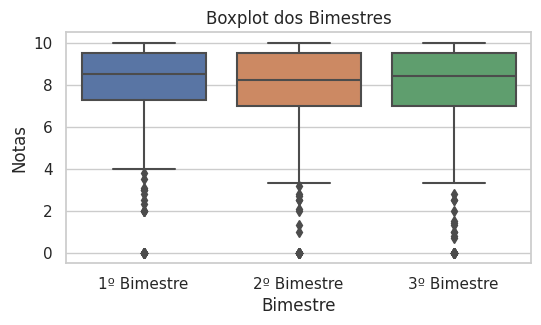

In [39]:
# Configurar a figura
plt.figure(figsize=(6, 3))

# Criar o boxplot
sns.boxplot(data=df1)
plt.title('Boxplot dos Bimestres')
plt.xlabel('Bimestre')
plt.ylabel('Notas')

# Mostrar o gráfico
plt.show()

In [40]:
# Exemplo: Remover outliers usando a regra do IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1_no_outliers = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

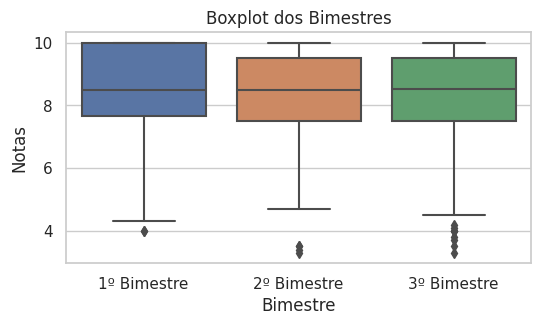

In [42]:
# Configurar a figura
plt.figure(figsize=(6, 3))

# Criar o boxplot
sns.boxplot(data=df1_no_outliers)
plt.title('Boxplot dos Bimestres')
plt.xlabel('Bimestre')
plt.ylabel('Notas')

# Mostrar o gráfico
plt.show()

Inicialmente, utilizamos uma técnica chamada Intervalo Interquartil (IQR) para identificar outliers no DataFrame original. Esse método considera a distribuição dos dados, calculando os quartis e definindo limites para identificar valores que se afastam significativamente do padrão.

Após a identificação, criamos um novo DataFrame chamado df_no_outliers, onde removemos as linhas que continham outliers. Esse processo visa melhorar a qualidade dos dados, eliminando valores extremos que podem distorcer análises estatísticas.

Ao comparar o DataFrame original (df1) e o DataFrame sem outliers (df1_no_outliers), observamos que o último não contém mais valores atípicos. Isso sugere uma redução na dispersão extrema dos dados, tornando-os mais consistentes e adequados para análises subsequentes.

# **6. Conclusão**

A análise dos dados começou com o DataFrame inicial (df), que representa um conjunto de notas de alunos em três bimestres. O objetivo primordial foi compreender a estrutura dos dados, identificando possíveis desafios e padrões que pudessem influenciar as análises subsequentes.

O processo foi iniciado com uma análise exploratória, utilizando comandos como df.shape e df.info() para entender a dimensão do DataFrame e a presença de dados faltantes. A identificação de dados ausentes nos levou à aplicação de estratégias como remoção de linhas ou imputação, visando garantir a integridade dos dados.

A análise estatística descritiva, realizada por meio do comando df.describe(), proporcionou insights sobre a distribuição das notas, seus valores médios e variações entre os bimestres. Essa etapa foi crucial para obter uma visão geral das características centrais do conjunto de dados.

Ao observarmos o número de valores únicos em cada bimestre usando df.nunique(), identificamos a diversidade de notas em cada período. Essa análise foi instrumental para entender a variabilidade nos desempenhos dos alunos ao longo do tempo.

A criação e visualização de histogramas para cada bimestre proporcionaram uma representação gráfica da distribuição das notas. Esse método permitiu a observação de padrões de concentração de notas e avaliação da simetria ou assimetria das distribuições.

A matriz de correlação, gerada por df.corr(), revelou as relações lineares entre os bimestres. A análise desse aspecto é fundamental para compreender se há associações consistentes entre os desempenhos em diferentes períodos.

Após essas etapas iniciais, identificamos a presença de outliers no DataFrame, para os quais aplicamos a regra do Intervalo Interquartil (IQR) com o objetivo de mitigar efeitos potencialmente distorcivos na análise.

Essas análises preliminares estabeleceram uma base sólida para investigações mais aprofundadas, orientando quanto às características e distribuições específicas dos dados. À medida que o trabalho avançou, considera-se técnicas mais avançadas e abordagens específicas para atingir os objetivos específicos de análise e extração de insights significativos deste conjunto de dados.